# House-Price-Prediction-India
This Notebook uses ML-algorithms to train model and predict house prices in India.

![title](picture.jfif)


## 1. Problem Defination
Problem is to predict the house prices in india using patterns in datasets.

## 2. Data
Dataset has been taken from the Kaggle.

For more details follow the link https://www.kaggle.com/anmolkumar/house-price-prediction-challenge

## 3. Evaluation 
The goal is to train model so that it predicts with as higher accuracy as possible.

## 4. Features
* POSTED_BY   -	Category marking who has listed the property
* UNDER_CONSTRUCTION  -	Under Construction or Not
* RERA -	Rera approved or Not
* BHK_NO  - 	Number of Rooms
* BHKORRK  -	Type of property
* SQUARE_FT -	Total area of the house in square feet
* READYTOMOVE  -	Category marking Ready to move or Not
* RESALE  -	Category marking Resale or not
* ADDRESS  -	Address of the property
* LONGITUDE -	Longitude of the property
* LATITUDE -	Latitude of the property

### Exploring the data

In [1]:
# Importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
# Importing train data as dataframe
df = pd.read_csv("datasets/train.csv")
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [3]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


###### Numerical variables

In [4]:
# Collecting all the numerical features
numerical_features = [feature for feature in df.columns if pd.api.types.is_numeric_dtype(df[feature])]
numerical_features

['UNDER_CONSTRUCTION',
 'RERA',
 'BHK_NO.',
 'SQUARE_FT',
 'READY_TO_MOVE',
 'RESALE',
 'LONGITUDE',
 'LATITUDE',
 'TARGET(PRICE_IN_LACS)']

In [5]:
# Collecting continuos numerical feature
continuous_num_features = [feature for feature in numerical_features if len(df[feature].unique())>25]
continuous_num_features

['SQUARE_FT', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)']

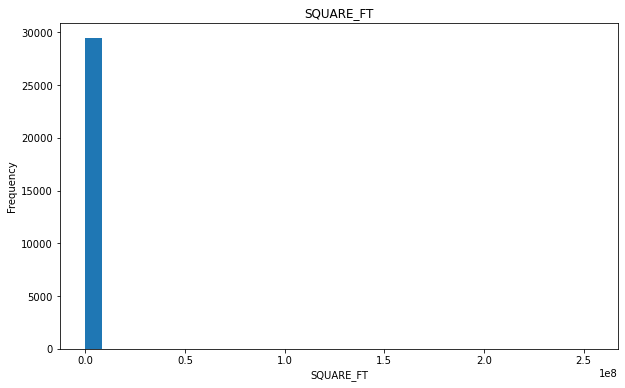

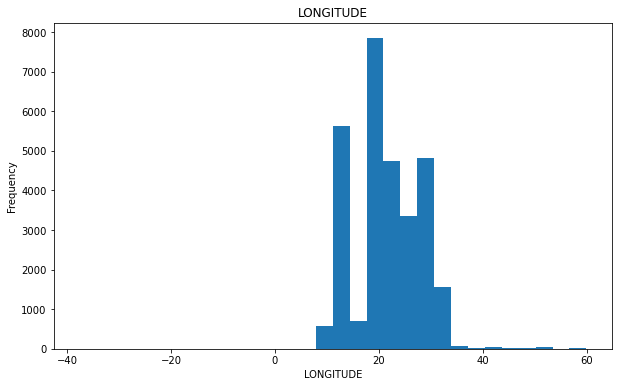

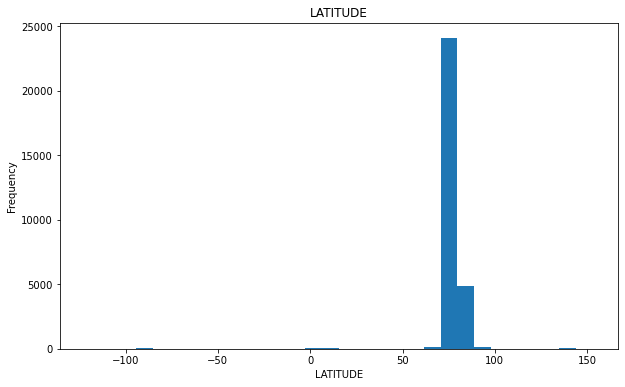

In [6]:
# Ploting histogram of continuous numerical features
for feature in continuous_num_features:
    if feature != "TARGET(PRICE_IN_LACS)":
        plt.figure(figsize=(10,6))
        df[feature].plot.hist(bins=30)
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.title(feature)
        plt.show()

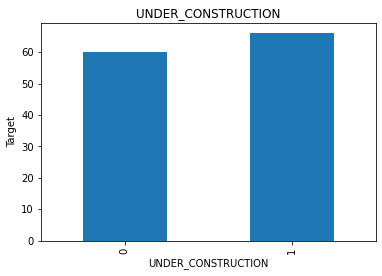

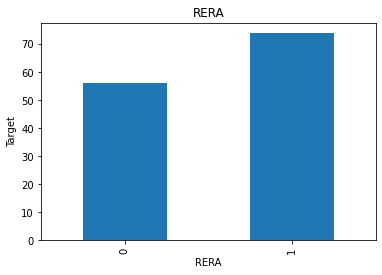

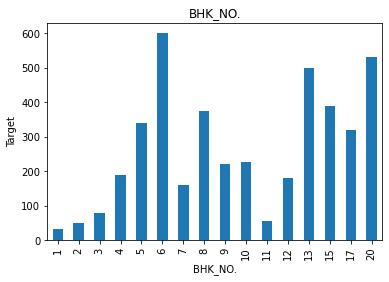

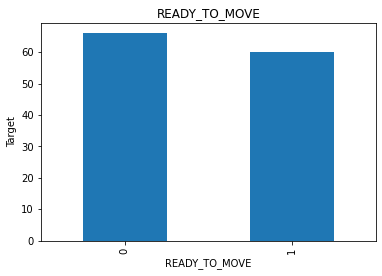

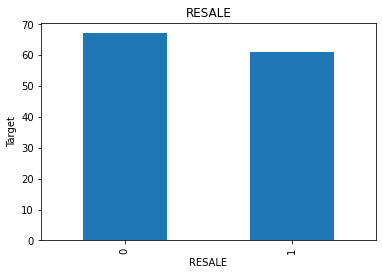

In [21]:
# Plotting bar plot of discreate numerical feature
discreate_num_features = [feature for feature in numerical_features if feature not in continuous_num_features]

for feature in discreate_num_features:
    data = df_temp.copy()
    plt.figure(figsize=(6,4))
    data.groupby(feature)["TARGET(PRICE_IN_LACS)"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Target")
    plt.title(feature)

##### Object variables

In [8]:
# Collecting all the object variables
object_features = [feature for feature in df.columns if not pd.api.types.is_numeric_dtype(df[feature])]
object_features

['POSTED_BY', 'BHK_OR_RK', 'ADDRESS']

In [10]:
len(df.ADDRESS.unique())

6899

In [11]:
# copying df without address feature
df_temp = df.drop("ADDRESS", axis=1)

In [12]:
df_temp.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5


In [ ]:
# 